# LECTURE 03: Logistic Regression

### Boilerplate code

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import random
import math

### Create dataset

In [55]:
dataX = []
dataY = []
for _ in range(100):
    x = random.random() * 10
    dataX.append([1, x])  # Include bias term
    # Create a logistic relationship: P(Y=1) increases with x
    p = 1 / (1 + np.exp(-(0.5 * x - 2)))  # Arbitrary coefficients
    dataY.append(random.random() < p)  # Probabilistic labels

### Generate random X and Y, and let all theta = 0

In [56]:
X = np.array(dataX)
Y = np.array(dataY)
theta = np.zeros(len(dataX[0]))

### Define logistic hypothesis functions

In [57]:
def hypothesisLogistic(X, theta):
    return sigmoid(np.dot(X, theta))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### BGD for Logistic Regression

In [62]:
def Bgd( # APPLICABLE FOR LINEAR AND LOGISTIC ONLY
    X: np.ndarray,
    Y: np.ndarray,
    theta: np.ndarray,
    learningRate: float,
    maxIteration: int,
) -> None:
    dataAmount = len(Y)
    for iter in range(maxIteration):
        h = hypothesisLogistic(X, theta)  # Vectorized predictions
        gradient = np.dot(X.T, (h - Y)) / dataAmount  # Vectorized gradient
        theta -= learningRate * gradient  # Vectorized update

### Test code

In [65]:
# Train the model
Bgd(X, Y, theta, learningRate=0.000001, maxIteration=10000000)

# Make predictions
predictions = hypothesisLogistic(X, theta) > 0.5

# Calculate accuracy
accuracy = np.mean(predictions == Y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


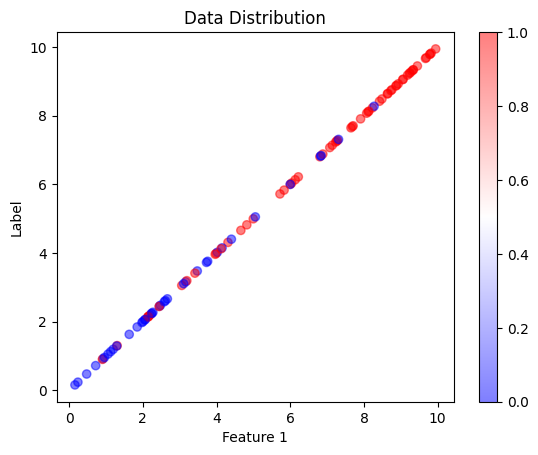

In [66]:
plt.scatter(X[:, 1], X[:, 2] if X.shape[1] > 2 else X[:, 1], c=Y, cmap='bwr', alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2" if X.shape[1] > 2 else "Label")
plt.title("Data Distribution")
plt.colorbar()
plt.show()

In [67]:
# Perfectly separable data (replace your dataset generation)
X_sep = np.random.rand(100, 2) * 10
Y_sep = (X_sep[:, 0] + X_sep[:, 1] > 10).astype(int)  # Simple linear boundary
theta_sep = np.zeros(X_sep.shape[1] + 1)
X_sep = np.column_stack([np.ones(len(X_sep)), X_sep])  # Add bias term

# Train and test
Bgd(X_sep, Y_sep, theta_sep, learningRate=0.1, maxIteration=1000)
predictions = hypothesisLogistic(X_sep, theta_sep) > 0.5
print(f"Synthetic Accuracy: {np.mean(predictions == Y_sep):.2f}")  # Should be 1.00

Synthetic Accuracy: 0.98
